Importando abase de dados 

#### Usando a biblioteca "yfinance" pois a pandas_datareader não tem mais suporte para os dados financeiros disponiveis no Yahoo

In [5]:
import pandas as pd
import yfinance as yf  # Para baixar os dados financeiros

# Baixando os dados da Procter & Gamble (PG) a partir de 1995
PG = yf.download('PG', start='1995-1-1')
print(PG.head())


[*********************100%***********************]  1 of 1 completed

Price          Close      High       Low      Open   Volume
Ticker            PG        PG        PG        PG       PG
Date                                                       
1995-01-03  7.441167  7.456079  7.366606  7.381518  3318400
1995-01-04  7.381520  7.470993  7.306959  7.411345  2218800
1995-01-05  7.277130  7.366603  7.262217  7.336778  2319600
1995-01-06  7.292042  7.351691  7.232394  7.232394  3438000
1995-01-09  7.262219  7.351692  7.247307  7.321868  1795200


Abaixo, uma breve esposição da base de dados

In [6]:
PG

Price,Close,High,Low,Open,Volume
Ticker,PG,PG,PG,PG,PG
Date,,,,,
1995-01-03,7.441167,7.456079,7.366606,7.381518,3318400
1995-01-04,7.381520,7.470993,7.306959,7.411345,2218800
1995-01-05,7.277130,7.366603,7.262217,7.336778,2319600
1995-01-06,7.292042,7.351691,7.232394,7.232394,3438000
1995-01-09,7.262219,7.351692,7.247307,7.321868,1795200
...,...,...,...,...,...
2024-12-26,170.160004,170.300003,168.070007,168.309998,3629400
2024-12-27,169.529999,170.759995,169.259995,169.419998,4367900


Se preferivel, pode visualizar a o data frame utilizando os comandos abaixo. 

In [7]:
PG.head()

Price,Close,High,Low,Open,Volume
Ticker,PG,PG,PG,PG,PG
Date,,,,,
1995-01-03,7.441167,7.456079,7.366606,7.381518,3318400
1995-01-04,7.381520,7.470993,7.306959,7.411345,2218800
1995-01-05,7.277130,7.366603,7.262217,7.336778,2319600
1995-01-06,7.292042,7.351691,7.232394,7.232394,3438000
1995-01-09,7.262219,7.351692,7.247307,7.321868,1795200


Abaixo para saber quando a base de dados termina. Ou seja, tem dados disponiveis ate o dia 20/12/2024. Caso eu faça uma atualização, provavelmente, terão dados todas os dias atualizados.

In [8]:
PG.tail()

Price,Close,High,Low,Open,Volume
Ticker,PG,PG,PG,PG,PG
Date,,,,,
2024-12-26,170.160004,170.300003,168.070007,168.309998,3629400
2024-12-27,169.529999,170.759995,169.259995,169.419998,4367900
2024-12-30,167.089996,168.979996,166.710007,168.669998,4354500
2024-12-31,167.649994,168.080002,166.589996,167.360001,3957600
2025-01-02,166.619995,168.705200,166.179993,168.085007,2039590


Outra forma de baixar os dados é por mais de uma ação. Neste caso, usaremos PG, MSFT, T, F e GE. 

In [9]:
import pandas as pd
import yfinance as yf  # Para baixar os dados financeiros

tickers = ['PG', 'MSFT', 'T', 'F', 'GE']
new_data = pd.DataFrame()

for t in tickers:
    new_data[t] = yf.download(t, start='1995-01-01')['Close']  # Apenas o preço de fechamento

print(new_data.head())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

                  PG      MSFT         T         F         GE
Date                                                         
1995-01-03  7.441168  2.319452  2.369481  3.569730  20.200665
1995-01-04  7.381518  2.336315  2.363452  3.665780  20.200665
1995-01-05  7.277135  2.297777  2.400382  3.633765  20.250158
1995-01-06  7.292044  2.336315  2.400382  3.633765  20.151140
1995-01-09  7.262219  2.321861  2.392997  3.697795  19.953106


Agora vamos ve até quando tem dados dessas ações

In [10]:
new_data.tail()

,PG,MSFT,T,F,GE
Date,,,,,
2024-12-26,170.160004,438.109985,22.959999,10.07,171.869995
2024-12-27,169.529999,430.529999,22.860001,10.03,170.080002
2024-12-30,167.089996,424.829987,22.610001,9.88,168.100006
2024-12-31,167.649994,421.500000,22.770000,9.90,166.789993
2025-01-02,166.619995,416.140015,22.930000,9.70,168.059998


### Agora vamos calcular a taxa de retorno de um ativo.

### Cálculo da Taxa Simples de Retorno

A fórmula para calcular a taxa simples de retorno (\(R_t\)) é:

\[
R_t = \frac{P_t - P_{t-1}}{P_{t-1}}
\]

Ou de forma equivalente:

\[
R_t = \frac{P_t}{P_{t-1}} - 1
\]

#### Variáveis:
- \(R_t\): Taxa de retorno no período \(t\);
- \(P_t\): Preço do ativo no final do período \(t\);
- \(P_{t-1}\): Preço do ativo no início do período \(t\).

#### Exemplo:
Se o preço de um ativo era \(P_{t-1} = 100\) e subiu para \(P_t = 110\):

\[
R_t = \frac{110 - 100}{100} = 0,10 \, \text{(ou 10\%)}
\]

É bom saber o nome das colunas, para aplicar a formula corretamente. 

In [11]:
print(PG.columns)

MultiIndex([( 'Close', 'PG'),
            (  'High', 'PG'),
            (   'Low', 'PG'),
            (  'Open', 'PG'),
            ('Volume', 'PG')],
           names=['Price', 'Ticker'])


In [12]:
PG['simple_return'] = PG['Close'] / PG['Close'].shift(1) - 1
print(PG['simple_return'])

Date
1995-01-03         NaN
1995-01-04   -0.008016
1995-01-05   -0.014142
1995-01-06    0.002049
1995-01-09   -0.004090
                ...   
2024-12-26    0.007222
2024-12-27   -0.003702
2024-12-30   -0.014393
2024-12-31    0.003351
2025-01-02   -0.006144
Name: simple_return, Length: 7553, dtype: float64


Agora vamos analisar o grafico da taxa de retorno nesta ação.

<Axes: xlabel='Date'>

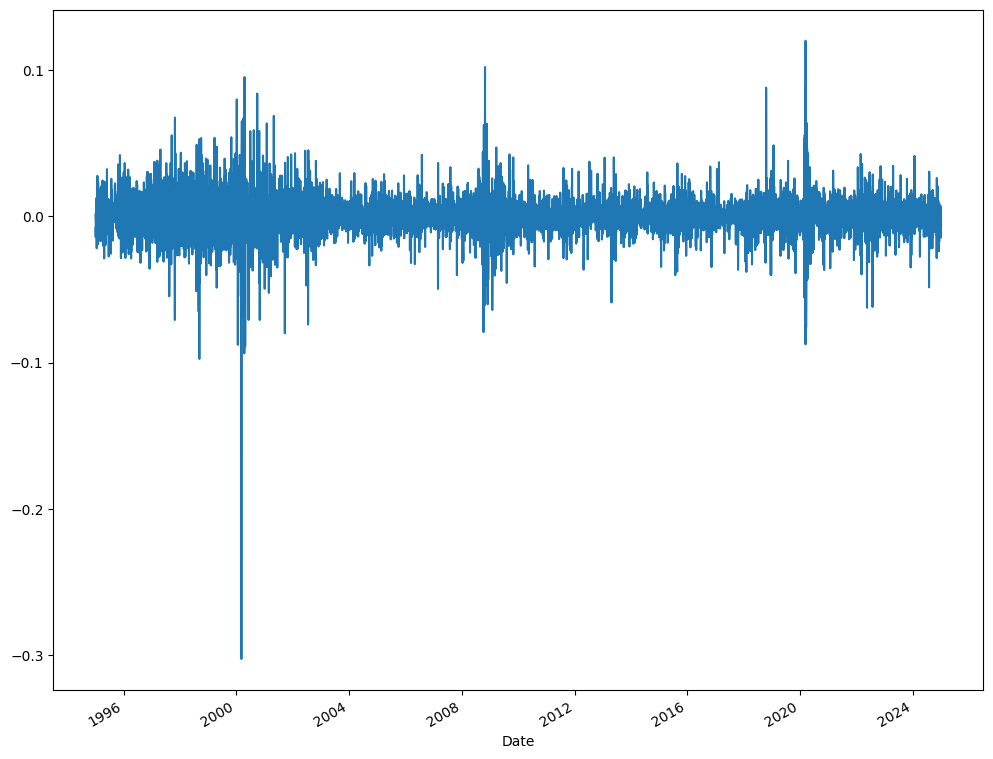

In [14]:
PG ['simple_return'].plot(figsize=(12,10))

Agora vamos calcular a taxa média de retorno

In [15]:
avg_returns_d = PG['simple_return'].mean()
avg_returns_d

0.000507989928964298

### Calcular a taxa media anual agora

In [16]:
avg_returns_a = PG['simple_return'].mean () *250
avg_returns_a

0.1269974822410745

Essa taxa não está definida em porcentagem. Vamos calcular para plotar os dados em porcentagem

In [17]:
print(str(round(avg_returns_a, 5) * 100) + '%')

12.7%


### Agora vamos calcular a taxa log de retorno

In [19]:
import numpy as np

PG['log_return'] = np.log(PG['Close'] / PG['Close'].shift(1))
print(PG['log_return'].head())

Date
1995-01-03         NaN
1995-01-04   -0.008048
1995-01-05   -0.014243
1995-01-06    0.002047
1995-01-09   -0.004098
Name: log_return, dtype: float64


Confirmação da criação da taxa LOG. 

In [20]:
PG.head()

Price,Close,High,Low,Open,Volume,simple_return,log_return
Ticker,PG,PG,PG,PG,PG,,
Date,,,,,,,
1995-01-03,7.441167,7.456079,7.366606,7.381518,3318400,NaN,NaN
1995-01-04,7.381520,7.470993,7.306959,7.411345,2218800,-0.008016,-0.008048
1995-01-05,7.277130,7.366603,7.262217,7.336778,2319600,-0.014142,-0.014243
1995-01-06,7.292042,7.351691,7.232394,7.232394,3438000,0.002049,0.002047
1995-01-09,7.262219,7.351692,7.247307,7.321868,1795200,-0.004090,-0.004098


<Axes: xlabel='Date'>

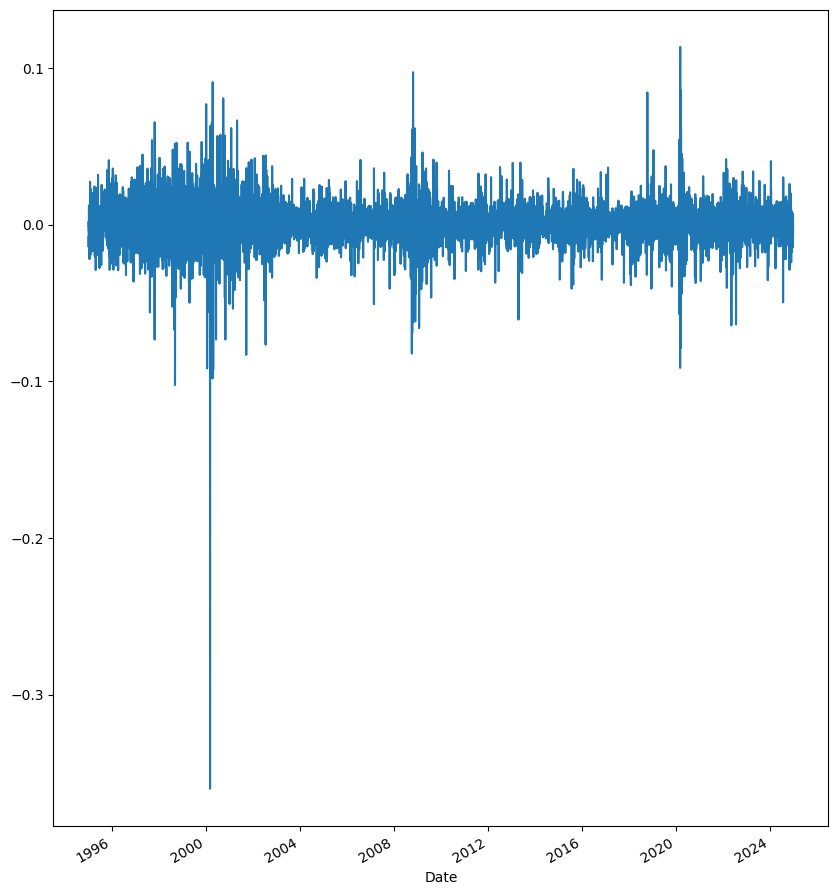

In [21]:
PG['log_return'].plot(figsize=(10,12))

In [22]:
log_return_d = PG['log_return'].mean
log_return_d

<bound method NDFrame._add_numeric_operations.<locals>.mean of Date
1995-01-03         NaN
1995-01-04   -0.008048
1995-01-05   -0.014243
1995-01-06    0.002047
1995-01-09   -0.004098
                ...   
2024-12-26    0.007196
2024-12-27   -0.003709
2024-12-30   -0.014497
2024-12-31    0.003346
2025-01-02   -0.006163
Name: log_return, Length: 7553, dtype: float64>

In [23]:
log_return_a = PG['log_return'].mean()*250
log_return_a

0.1029094301604789

In [24]:
print(str(round(log_return_a, 5) * 100) + '%')

10.291%


Nos casos acima,  consideramos o investidor que tem apenas uma ação, porem, isso raramente acontece, vamos analisar agora o que acontece com a carteira de um investidor que tem mais de uma ação. 